In [190]:
# SIMULATIONS OF COMPLEX SYSTEMS
# 2020 Project: Simulation of stadium evacuation
# Collaborators: Alfred Bergsten, Giannis Kostaras, Mohammad Zoubi, Andreas Spetz

import numpy as np
import random
import matplotlib.pyplot as plt
import stadium
import templates


def print_info(name):
    print(f'Project: {name}')  # Press Ctrl+F8 to toggle the breakpoint.

class agent:
  def __init__(self, tag, x, y):
    self.tag = tag
    self.x = x
    self.y = y
    self.moved = 0
    
def initiate_agents_test(grid):
    return [agent(0, 266, 178), agent(1, 266, 180)]
    
def visualize(grid, agents):
    grid_to_plot = 0
    grid_to_plot = grid
    for agent in agents:
        print(agent.x,agent.y)
        grid_to_plot[agent.x][agent.y] = 8
    plt.figure(figsize = (16,16))
    plt.imshow(grid_to_plot, interpolation='nearest')
    plt.show()
    
def move_agent(grid, agents, agent):  # moves one agent by one time step
    x_dim = grid.shape[0]
    y_dim = grid.shape[1]
    gate_x = []
    gate_y = []
    gate = []
    grid_saved = grid
    for x in range(x_dim):  # find the gates
        for y in range(y_dim):
            if grid[x][y] == 2:
                gate_x.append(x)
                gate_y.append(y)
                gate.append([x,y])
    gate_distances = []  # find the nearest gate to the agent
    for g in gate:
        gate_distances.append(abs(agent.x-g[0])+abs(agent.y-g[1]))
    nearest_gate = gate[gate_distances.index(min(gate_distances))]  # this is the nearest gate to the agent
    for a in agents:  # designate the occupied positions by other agents to avoid collisions
        grid_saved[a.x][a.y] = 8
    if (agent.x < nearest_gate[0]) and (grid_saved[agent.x+1][agent.y]==3):
        agent.x += 1
    if (agent.x > nearest_gate[0]) and (grid_saved[agent.x-1][agent.y]==3):
        agent.x -= 1
    if (agent.y < nearest_gate[1]) and (grid_saved[agent.x][agent.y+1]==3):
        agent.y += 1
    if (agent.y > nearest_gate[1]) and (grid_saved[agent.x][agent.y-1]==3):
        agent.y -= 1
        
    


                    
# Press the green button in the gutter to run the script.
if __name__ == '__main__':
    print_info('Stadium evacuation simulation.')
    stadium_outline = templates.big_stadium()
    stadium_big = stadium.create_stadium(stadium_outline)
    agents = []
    agents = initiate_agents_test(stadium_big)

Project: Stadium evacuation simulation.


266 178
266 180


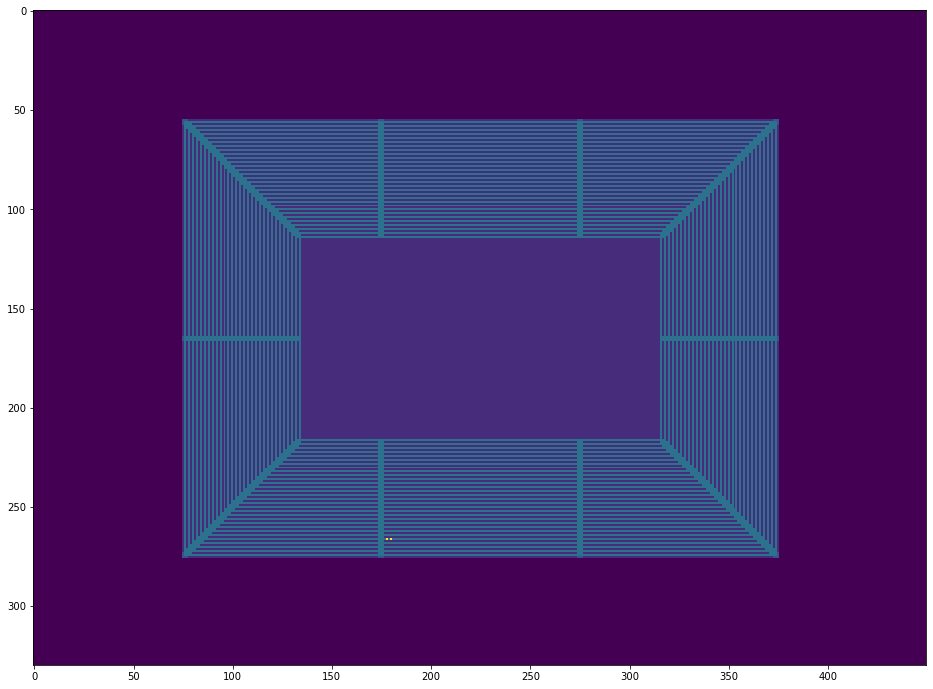

In [191]:
visualize(stadium_big, agents)

In [192]:
for t in range(10):
    for agent in agents:
        move_agent(stadium_big, agents, agent)
        print(agent.tag, ': ', agent.x, agent.y)

0 :  266 177
1 :  266 179
0 :  266 176
1 :  266 179
0 :  267 176
1 :  266 179
0 :  268 176
1 :  266 179
0 :  269 176
1 :  266 179
0 :  270 176
1 :  266 179
0 :  271 176
1 :  266 179
0 :  272 176
1 :  266 179
0 :  273 176
1 :  266 179
0 :  274 176
1 :  266 179
